In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-xnt6nz44
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-xnt6nz44
  Resolved https://github.com/facebookresearch/detectron2.git to commit 38af375052d3ae7331141bc1a22cfa2713b02987
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# clone and install Mask2Former
!git clone https://github.com/facebookresearch/Mask2Former.git
%cd Mask2Former
!pip install -U opencv-python
!pip install git+https://github.com/mcordts/cityscapesScripts.git
!pip install -r requirements.txt
%cd mask2former/modeling/pixel_decoder/ops
!python setup.py build install
%cd ../../../../

Cloning into 'Mask2Former'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 297 (delta 126), reused 293 (delta 126), pack-reused 4
Receiving objects: 100% (297/297), 412.62 KiB | 14.74 MiB/s, done.
Resolving deltas: 100% (126/126), done.
/content/Mask2Former
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mcordts/cityscapesScripts.git to /tmp/pip-req-build-as4_m6jv
  Running command git clone --filter=blob:none --quiet https://github.com/mc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.3 MB/s eta 0:00:00
/content/Mask2Former/mask2former/modeling/pixel_decoder/ops
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.8
creating build/lib.linux-x86_64-3.8/modules
copying modules/__init__.py -> build/lib.linux-x86_64-3.8/modules
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-3.8/modules
creating build/lib.linux-x86_64-3.8/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-3.8/functions
copying functions/__init__.py -> build/lib.linux-x86_64-3.8/functions
running build_ext
/usr/local/lib/python3.8/dist-packages/torch/utils/cpp_extension.py:476: UserWarning: Attempted to use ninja as the Bui

In [ ]:
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.8 MB/s eta 0:00:00


Restart runtime here

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
import seaborn as sb
from matplotlib import cm

import cv2
#import faiss
from google.colab.patches import cv2_imshow
from skimage.measure import block_reduce

In [ ]:
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  1.13 ; cuda:  cu116


In [ ]:
%cd /content/Mask2Former
import detectron2
from detectron2.utils.logger import setup_logger

setup_logger()
setup_logger(name="mask2former")

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
from detectron2.projects.deeplab import add_deeplab_config
cityscapes_metadata = MetadataCatalog.get("cityscapes_fine_sem_seg_train")
from scipy.stats import mode


# import Mask2Former project
from mask2former import add_maskformer2_config

/content/Mask2Former


In [ ]:
cityscapes_metadata.as_dict()

{'name': 'cityscapes_fine_sem_seg_train',
 'image_dir': 'datasets/cityscapes/leftImg8bit/train/',
 'gt_dir': 'datasets/cityscapes/gtFine/train/',
 'evaluator_type': 'cityscapes_sem_seg',
 'ignore_label': 255,
 'thing_classes': ['person',
  'rider',
  'car',
  'truck',
  'bus',
  'train',
  'motorcycle',
  'bicycle'],
 'stuff_classes': ['road',
  'sidewalk',
  'building',
  'wall',
  'fence',
  'pole',
  'traffic light',
  'traffic sign',
  'vegetation',
  'terrain',
  'sky',
  'person',
  'rider',
  'car',
  'truck',
  'bus',
  'train',
  'motorcycle',
  'bicycle']}

In [ ]:
ground_truth_labels = cityscapes_metadata.as_dict()['stuff_classes']

In [ ]:
for i, label in enumerate(ground_truth_labels):
  print(i, label)

0 road
1 sidewalk
2 building
3 wall
4 fence
5 pole
6 traffic light
7 traffic sign
8 vegetation
9 terrain
10 sky
11 person
12 rider
13 car
14 truck
15 bus
16 train
17 motorcycle
18 bicycle


In [ ]:
# Hard coded the labels to be identified as shadow areas
# These include persons, animals, vehicles, sky and trees
shadow_labels = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] 

In [ ]:
#Declare the mask2former model
cfg = get_cfg()
add_deeplab_config(cfg)
add_maskformer2_config(cfg)
cfg.merge_from_file("configs/cityscapes/semantic-segmentation/swin/maskformer2_swin_large_IN21k_384_bs16_90k.yaml")
cfg.MODEL.WEIGHTS = 'https://dl.fbaipublicfiles.com/maskformer/mask2former/cityscapes/semantic/maskformer2_swin_large_IN21k_384_bs16_90k/model_final_17c1ee.pkl'
cfg.MODEL.MASK_FORMER.TEST.SEMANTIC_ON = True
predictor = DefaultPredictor(cfg)

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/20 12:57:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/maskformer/mask2former/cityscapes/semantic/maskformer2_swin_large_IN21k_384_bs16_90k/model_final_17c1ee.pkl ...


model_final_17c1ee.pkl: 866MB [01:04, 13.5MB/s]                           


WARNING [02/20 12:58:52 mask2former.modeling.transformer_decoder.mask2former_transformer_decoder]: Weight format of MultiScaleMaskedTransformerDecoder have changed! Please upgrade your models. Applying automatic conversion now ...


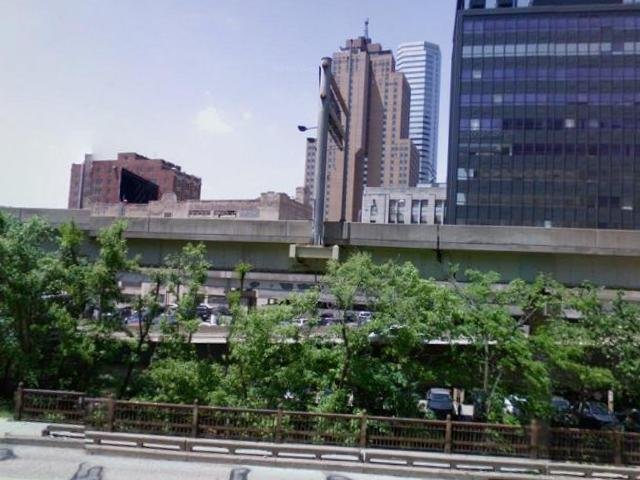

In [ ]:
imgTest = cv2.imread("/content/002998_pitch1_yaw10.jpg")
cv2_imshow(imgTest)

In [ ]:
outputs = predictor(imgTest)
labels = np.array(outputs["sem_seg"].argmax(0).to("cpu"))

In [ ]:
labels

array([[10, 10, 10, ...,  2,  2,  2],
       [10, 10, 10, ...,  2,  2,  2],
       [10, 10, 10, ...,  2,  2,  2],
       ...,
       [ 0,  0,  0, ...,  3,  3,  3],
       [ 0,  0,  0, ...,  3,  3,  3],
       [ 0,  0,  0, ...,  3,  3,  3]])

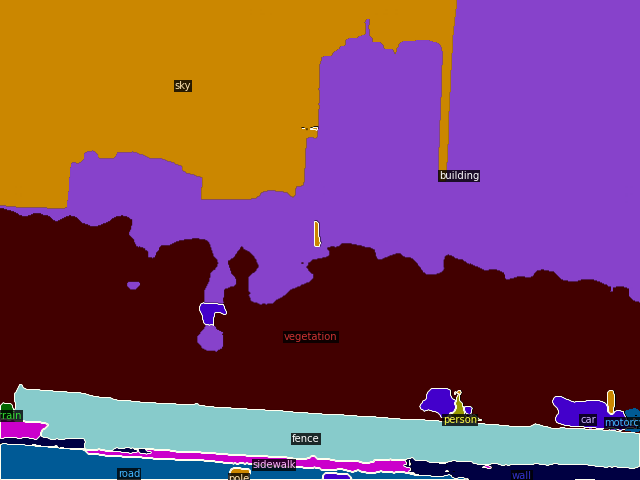

In [ ]:
v = Visualizer([[[0] * 3] * 640] * 480, cityscapes_metadata, instance_mode=ColorMode.IMAGE_BW)
semanticLabels = v.draw_sem_seg(outputs["sem_seg"].argmax(0).to("cpu")).get_image()
cv2_imshow(semanticLabels[:, :, ::-1])

Declaring the Neural Network

In [ ]:
class L2Norm(nn.Module):
  def __init__(self, dim=1):
    super().__init__()
    self.dim = dim

  def forward(self, input):
    return F.normalize(input, p=2, dim=self.dim)

In [ ]:
encoder_dim = 512
encoder = models.vgg16(weights=models.vgg.VGG16_Weights.DEFAULT)
encoder.cuda()
# capture only feature part and remove last relu and maxpool
layers = list(encoder.features.children())[:-2]
layers.append(L2Norm())
encoder = nn.Sequential(*layers)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
summary(encoder, (3,640,480))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 640, 480]           1,792
              ReLU-2         [-1, 64, 640, 480]               0
            Conv2d-3         [-1, 64, 640, 480]          36,928
              ReLU-4         [-1, 64, 640, 480]               0
         MaxPool2d-5         [-1, 64, 320, 240]               0
            Conv2d-6        [-1, 128, 320, 240]          73,856
              ReLU-7        [-1, 128, 320, 240]               0
            Conv2d-8        [-1, 128, 320, 240]         147,584
              ReLU-9        [-1, 128, 320, 240]               0
        MaxPool2d-10        [-1, 128, 160, 120]               0
           Conv2d-11        [-1, 256, 160, 120]         295,168
             ReLU-12        [-1, 256, 160, 120]               0
           Conv2d-13        [-1, 256, 160, 120]         590,080
             ReLU-14        [-1, 256, 1

In [ ]:
# Transform the image as required by the VGG-16 for input

transform_pipeline = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])

img = Image.fromarray(imgTest)
img = transform_pipeline(img)
img = img.unsqueeze(0)  
img = Variable(img)
img = img.cuda()
print(img.shape)
encoder.eval()
with torch.no_grad():
  output = encoder(img)
output.shape

torch.Size([1, 3, 480, 640])


torch.Size([1, 512, 30, 40])

In [ ]:
inputs_in_3d = torch.transpose(torch.squeeze(output), 0, 2)
print(inputs_in_3d.shape)
inputs = inputs_in_3d.reshape([1200, 512]).cpu()

torch.Size([40, 30, 512])


In [ ]:
km = faiss.Kmeans(512, 128, niter = 160, verbose = True)
km.train(inputs.numpy())

62.23432540893555

In [ ]:
index = faiss.IndexFlatL2(512)
index.add(km.centroids)
distances, clusterAssignment = index.search(inputs.numpy(), 1)
clusterAssignment.ravel()

array([ 28,  77,  77, ...,  96,  43, 106])

In [ ]:
noOfInformative = 1
noOfShadow = 4

In [ ]:
gue

In [ ]:
def mode_func(block, axis):
  print(type(axis))
  return mode(block, axis=2)[0]
downsampled = block_reduce(labels, (16, 16), np.max)

Mode Downsampling

In [ ]:
def countless(data):
  """
  Vectorized implementation of downsampling a 2D 
  image by 2 on each side using the COUNTLESS algorithm.
  
  data is a 2D numpy array with even dimensions.
  """
  # allows us to prevent losing 1/2 a bit of information 
  # at the top end by using a bigger type. Without this 255 is handled incorrectly.
  data, upgraded = upgrade_type(data) 

  data = data + 1 # don't use +=, it will affect the original data.

  sections = []
  
  # This loop splits the 2D array apart into four arrays that are
  # all the result of striding by 2 and offset by (0,0), (0,1), (1,0), 
  # and (1,1) representing the A, B, C, and D positions from Figure 1.
  factor = (2,2)
  for offset in np.ndindex(factor):
    part = data[tuple(np.s_[o::f] for o, f in zip(offset, factor))]
    sections.append(part)

  a, b, c, d = sections

  ab_ac = a * ((a == b) | (a == c)) # PICK(A,B) || PICK(A,C) w/ optimization
  bc = b * (b == c) # PICK(B,C)

  a = ab_ac | bc # (PICK(A,B) || PICK(A,C)) or PICK(B,C)
  result = a + (a == 0) * d - 1 # (matches or d) - 1

  if upgraded:
    return downgrade_type(result)

  return result

def upgrade_type(arr):
  dtype = arr.dtype

  if dtype == np.uint8:
    return arr.astype(np.uint16), True
  elif dtype == np.uint16:
    return arr.astype(np.uint32), True
  elif dtype == np.uint32:
    return arr.astype(np.uint64), True

  return arr, False
  
def downgrade_type(arr):
  dtype = arr.dtype

  if dtype == np.uint64:
    return arr.astype(np.uint32)
  elif dtype == np.uint32:
    return arr.astype(np.uint16)
  elif dtype == np.uint16:
    return arr.astype(np.uint8)
  
  return arr

In [ ]:
while labels.shape > (30, 40):
  labels = countless(labels)
print(labels)
print(labels.shape)

[[10 10 10 ...  2  2  2]
 [10 10 10 ...  2  2  2]
 [10 10 10 ...  2  2  2]
 ...
 [ 1  1  3 ...  4  4  4]
 [ 0  0  0 ...  4  4  4]
 [ 0  0  0 ...  4  4  4]]
(30, 40)


(0.0, 40.0, 30.0, 0.0)

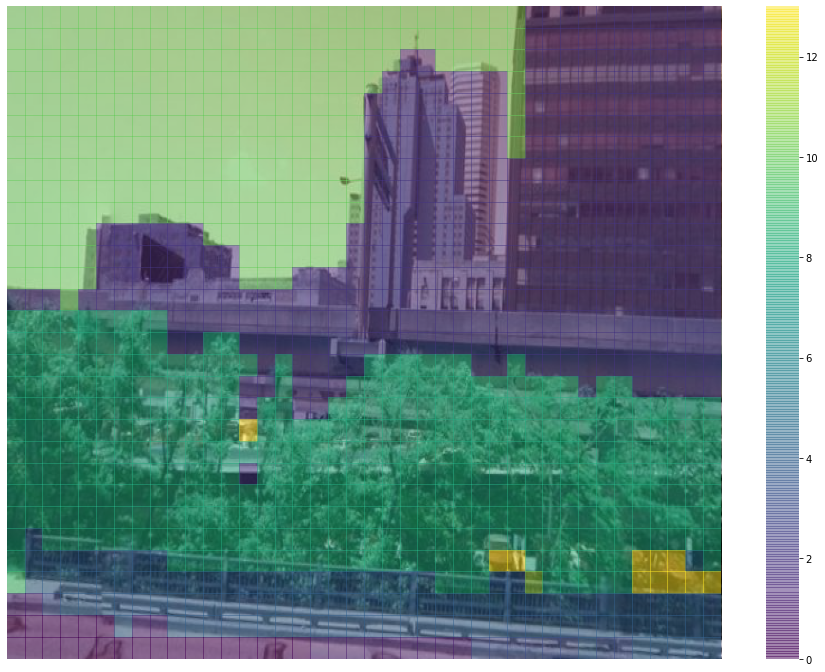

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
sb.heatmap(labels,ax=ax, alpha = 0.5, zorder = 2, cmap = 'viridis')
ax.imshow(imgTest, aspect = ax.get_aspect(),
          extent = ax.get_xlim() + ax.get_ylim(),
          zorder = 1)
ax.axis('off')

In [ ]:
np.unique(downsampled, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 13, 14, 17]),
 array([ 18,   8, 321,   6, 112,   5, 407,   2, 287,   3,  27,   1,   3]))

In [ ]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 13]),
 array([ 23,  13, 390,   9, 109,   1, 379,   1, 263,   1,  11]))

In [ ]:
ogIndex = [x for x in range(40 * 30)]
sortedIndex = np.array(ogIndex)[inds]

In [ ]:
labels = labels.reshape(1200, 1)
sortedLabels = labels[inds]
splitLabels = np.split(sortedLabels, np.where(np.diff(np.sort(clusterAssignment.ravel())))[0]+1)

In [ ]:
b = 100

def customSoftmax(x, shadow, informative):
  informativeScore = np.sum(np.exp(-1 * b * (x - informative) ** 2))
  shadowScore = np.sum(np.exp(-1 * b * (x - shadow) ** 2))
  return informativeScore / (informativeScore + shadowScore)

In [ ]:
weights = []
# Iterate through each of the clusters and their respective labels
for cluster, labels in zip(splitClusters, splitLabels):

  # Collect the informative and shadow centroids in the cluster
  informativeInCluster = []
  shadowInCluster = []
  for element, label in zip(cluster, labels):
    (informativeInCluster, shadowInCluster)[label in shadow_labels].append(element)

  # Adjustments as described above
  if not informativeInCluster:
    informativeInCluster.append(cluster[0])
  if not shadowInCluster:
    shadowInCluster.append(cluster[0])

  # Finding the centroids
  informativeCentroid = np.mean(informativeInCluster, axis = 0)
  shadowCentroids = shadowInCluster
  if len(shadowCentroids) > 4:
    kMeans = faiss.Kmeans(512, 4, niter = 16)
    kMeans.train(np.array(shadowCentroids))
    shadowCentroids = kMeans.centroids
  
  for element in cluster:
    # Append the weight for this particular point
    weights.append(customSoftmax(element, shadowCentroids, informativeCentroid))

In [ ]:
inds = sortedIndex.argsort()
weights = np.array(weights)[inds]
# Reshape the weights to the size of the output
weights = np.array(weights)

In [ ]:
weights = weights.reshape((30,40))

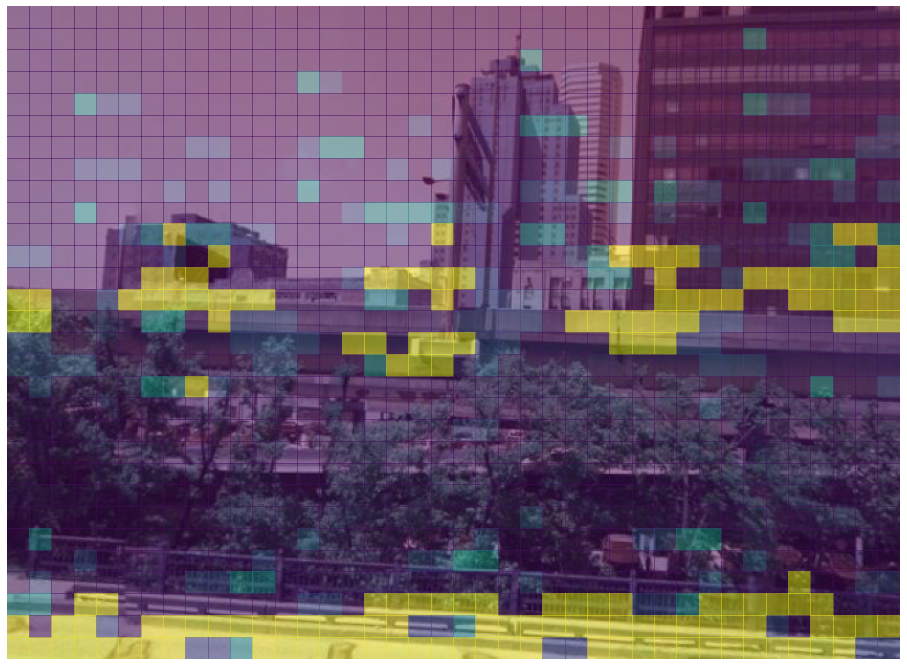

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
sb.heatmap(weights,ax=ax, alpha = 0.5, zorder = 2,  cmap="viridis", cbar = False)
ax.imshow(imgTest, aspect = ax.get_aspect(),
          extent = ax.get_xlim() + ax.get_ylim(),
          zorder = 1)
ax.axis('off')
plt.savefig('heatmap1.png', bbox_inches='tight', pad_inches=0)

In [ ]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 13])